# Speech Processing: Exp 1

## Task 1

Write a program to read in a speech file with a sampling rate of $F_s=16\,\mathrm{kHz}$ and filter it to bandwidths of $5$, $4$, and $3\,\mathrm{kHz}$. Save the filtered speech to files. Listen to each of the resulting files and describe the effect of lowpass filtering on speech intelligibility and quality. (Use the speech file `test_16k.wav` to test your program and generate the filtered speech files.)

### Solution

Lowpass filter response


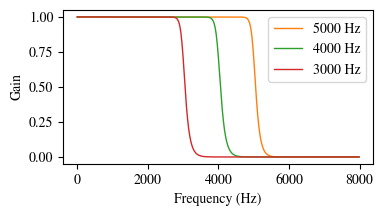

Waveform


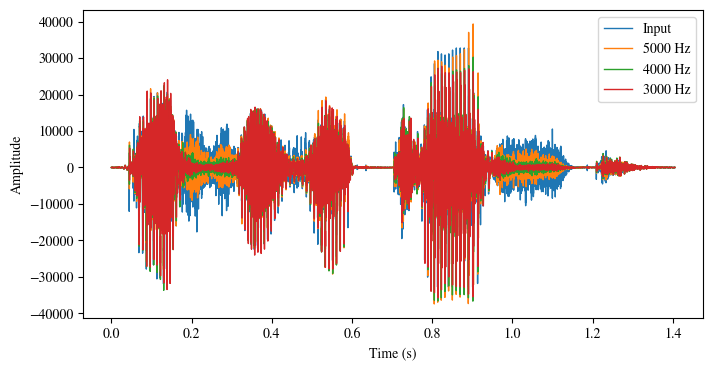

Input:


5kHz


4kHz


3kHz


In [1]:
import matplotlib.pyplot as plt
from IPython.display import Audio

import numpy as np
from scipy.io import wavfile
from scipy import signal


input_file = 'test_16k.wav'
output_files = ['filtered_5kHz.wav', 'filtered_4kHz.wav', 'filtered_3kHz.wav']
bandwidths = [5000, 4000, 3000]

response_fig, response_ax = plt.subplots(1, figsize=(4, 2))
response_ax.set_xlabel('Frequency (Hz)')
response_ax.set_ylabel('Gain')

wave_fig, wave_ax = plt.subplots(1, figsize=(8, 4))
wave_ax.set_xlabel('Time (s)')
wave_ax.set_ylabel('Amplitude')

rate, data = wavfile.read(input_file)
times = np.arange(len(data)) / float(rate)
response_ax.plot([], [])
wave_ax.plot(times, data, label='Input')

for bandwidth, output_file in zip(bandwidths, output_files):
    b, a = signal.butter(24, bandwidth, fs=rate)
    freqs, gains = signal.freqz(b, a, fs=rate)
    filtered_data = signal.lfilter(b, a, data)

    response_ax.plot(freqs, np.abs(gains), label=f'{bandwidth} Hz')
    wave_ax.plot(times, filtered_data, label=f'{bandwidth} Hz')
    wavfile.write(output_file, rate, filtered_data.astype(np.int16))

print('Lowpass filter response')
response_ax.legend()
display(response_fig)
plt.close(response_fig)

print('Waveform')
wave_ax.legend()
display(wave_fig)
plt.close(wave_fig)

print('Input:')
display(Audio(input_file))
print('5kHz')
display(Audio(output_files[0]))
print('4kHz')
display(Audio(output_files[1]))
print('3kHz')
display(Audio(output_files[2]))

Lowpass filtering of speech reduces high-frequency components, diminishing speech intelligibility by blurring consonant sounds and causing muffling. It also decreases speech quality, making it sound less natural and fidelity is lost, with the extent depending on the cutoff frequency.

## Task 2

Compute and plot the vocal tract log magnitude spectrum and mark the locations of the formants for a two-tube model of the vocal tract. The frequency response of this model is given as

$$
V_a(\Omega) = \frac{U_L(\Omega)}{U_G(\Omega)} = \frac{0.5(1+r_G)(1+r_L)(1+r_1)e^{-j\Omega(\tau_1+\tau_2)}}{1+r_1r_Ge^{-j\Omega2\tau_1}+r_1r_Le^{-j\Omega2\tau_2}+r_Gr_Le^{-j\Omega2(\tau_1+\tau_2)}}
$$

Your code should accept the input lengths ($l_1$ and $l_2$ in $\mathrm{cm}$) and areas ($A_1$ and $A_2$
in $\mathrm{cm^2}$) of a two-tube model of the vocal tract, along with the reflection coefficients at the
glottis ($r_G$) and at the lips ($r_L$). Test your code on the following examples:

1. $l_1 = 10$, $l_2 = 7.5$, $A_1 = 1$, $A_2 = 1$, $r_G = 0.7$, $r_L = 0.7$;
2. $l_1 = 15.5$, $l_2 = 2$, $A_1 = 8$, $A_2 = 1$, $r_G = 0.7$, $r_L = 0.7$;
3. $l_1 = 9.5$, $l_2 = 8$, $A_1 = 8$, $A_2 = 1$, $r_G = 0.7$, $r_L = 0.7$;
4. $l_1 = 8.75$, $l_2 = 8$, $A_1 = 8$, $A_2 = 1$, $r_G = 0.7$, $r_L = 0.7$;

You can use a value of $c = 35000\,\mathrm{cm/sec}$ as the speed of sound. What happens to the log
magnitude spectral plots if both $r_G$ and $r_L$ are set to $1.0$ (rather than $0.7$)?


### Solution

The propagation delay from the glottis to the junction ($\tau_1$) and from the junction to the lips ($\tau_2$) are given as

$$
\tau_1 = \frac{l_1}{c},\quad \tau_2 = \frac{l_2}{c}
$$

The reflection coefficient at the junction ($r_1$) is given as

$$
r_1 = \frac{A_2-A_1}{A_2+A_1}
$$


(1)


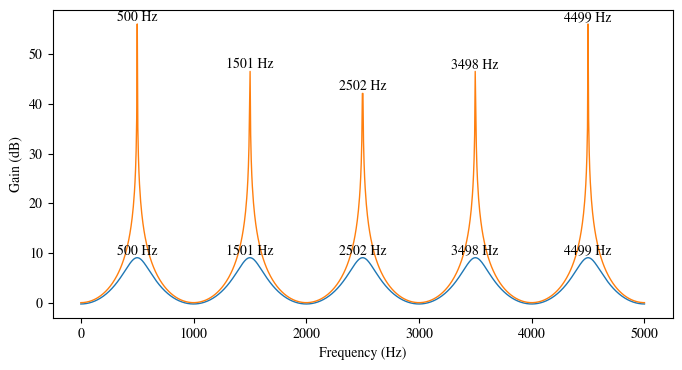

(2)


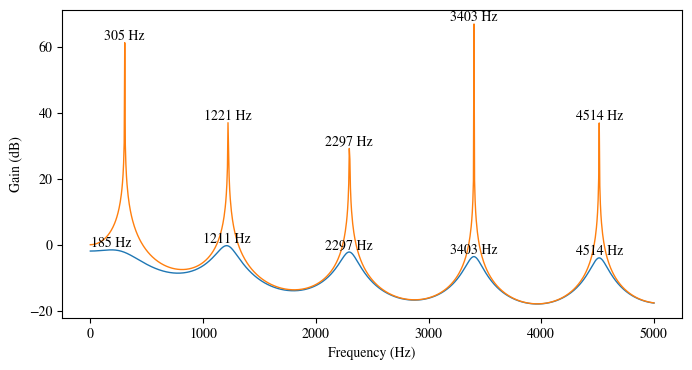

(3)


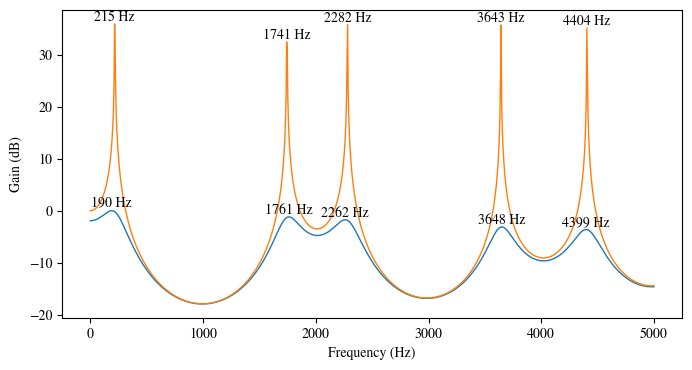

(4)


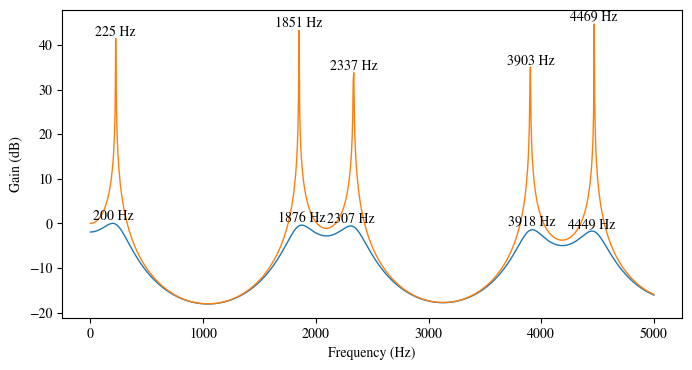

In [2]:
import matplotlib.pyplot as plt

import numpy as np
from scipy import signal


freqs = np.linspace(0, 5000, 1000)


def plot_spectrum(c, l1, l2, A1, A2, rG, rL):
    r1 = (A2 - A1) / (A2 + A1)
    exp1 = np.exp(-1j * 2 * np.pi * freqs * l1 / c)
    exp2 = np.exp(-1j * 2 * np.pi * freqs * l2 / c)
    exp1_sq = exp1**2
    exp2_sq = exp2**2
    num = 0.5 * (1 + rG) * (1 + rL) * (1 + r1) * exp1 * exp2
    den = 1 + r1 * rG * exp1_sq + r1 * rL * exp2_sq + rG * rL * exp1_sq * exp2_sq
    gains = 20 * np.log10(np.abs(num / den))

    plt.plot(freqs, gains)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')

    peak_idx = signal.find_peaks(gains)[0]
    for idx in peak_idx:
        plt.annotate(
            f'{int(freqs[idx])} Hz', (freqs[idx], gains[idx]), ha='center', va='bottom'
        )


plt.figure(figsize=(8, 4))
plot_spectrum(c=35000, l1=10, l2=7.5, A1=1, A2=1, rG=0.7, rL=0.7)
plot_spectrum(c=35000, l1=10, l2=7.5, A1=1, A2=1, rG=1.0, rL=1.0)
print('(1)')
plt.show()

plt.figure(figsize=(8, 4))
plot_spectrum(c=35000, l1=15.5, l2=2, A1=8, A2=1, rG=0.7, rL=0.7)
plot_spectrum(c=35000, l1=15.5, l2=2, A1=8, A2=1, rG=1.0, rL=1.0)
print('(2)')
plt.show()

plt.figure(figsize=(8, 4))
plot_spectrum(c=35000, l1=9.5, l2=8, A1=8, A2=1, rG=0.7, rL=0.7)
plot_spectrum(c=35000, l1=9.5, l2=8, A1=8, A2=1, rG=1.0, rL=1.0)
print('(3)')
plt.show()

plt.figure(figsize=(8, 4))
plot_spectrum(c=35000, l1=8.75, l2=8, A1=8, A2=1, rG=0.7, rL=0.7)
plot_spectrum(c=35000, l1=8.75, l2=8, A1=8, A2=1, rG=1.0, rL=1.0)
print('(4)')
plt.show()

When both $r_G$ and $r_L$ are changed from $0.7$ to $1.0$, the formants shift in the last three examples and all the the peaks become much sharper with higher amplitudes and narrower bandwidths.
